# Importing libraries

In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth

# Dataset details

In [3]:
df = pd.read_csv("data.csv")
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [5]:
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


# Products frequencies

In [6]:
df.dropna(inplace=True)

In [7]:
transactions = df.groupby('Member_number')['itemDescription'].apply(list)

In [8]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [9]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

In [10]:
frequent_itemsets['frequency'] = frequent_itemsets['support'] * len(transactions)
print(frequent_itemsets)

     support                        itemsets  frequency
0   0.119548                          (beef)      466.0
1   0.158799                  (bottled beer)      619.0
2   0.213699                 (bottled water)      833.0
3   0.135967                   (brown bread)      530.0
4   0.126475                        (butter)      493.0
5   0.165213                   (canned beer)      644.0
6   0.100564                       (chicken)      392.0
7   0.185480                  (citrus fruit)      723.0
8   0.114931                        (coffee)      448.0
9   0.120831                          (curd)      471.0
10  0.133145                 (domestic eggs)      519.0
11  0.137506                   (frankfurter)      536.0
12  0.102617             (frozen vegetables)      400.0
13  0.124936         (fruit/vegetable juice)      487.0
14  0.116983                     (margarine)      456.0
15  0.139815                    (newspapers)      545.0
16  0.376603              (other vegetables)    

In [14]:
rules = association_rules(frequent_itemsets, num_itemsets=len(frequent_itemsets), metric="confidence", min_threshold=0.2)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
0,(bottled water),(whole milk),0.112365,0.525810,1.147597
1,(whole milk),(bottled water),0.112365,0.245241,1.147597
2,(other vegetables),(rolls/buns),0.146742,0.389646,1.114335
3,(rolls/buns),(other vegetables),0.146742,0.419663,1.114335
4,(other vegetables),(soda),0.124166,0.329700,1.051695
5,(soda),(other vegetables),0.124166,0.396072,1.051695
6,(other vegetables),(whole milk),0.191380,0.508174,1.109106
7,(whole milk),(other vegetables),0.191380,0.417693,1.109106
8,(other vegetables),(yogurt),0.120318,0.319482,1.129050
9,(yogurt),(other vegetables),0.120318,0.425204,1.129050


# Visualization of Confidence vs Lift

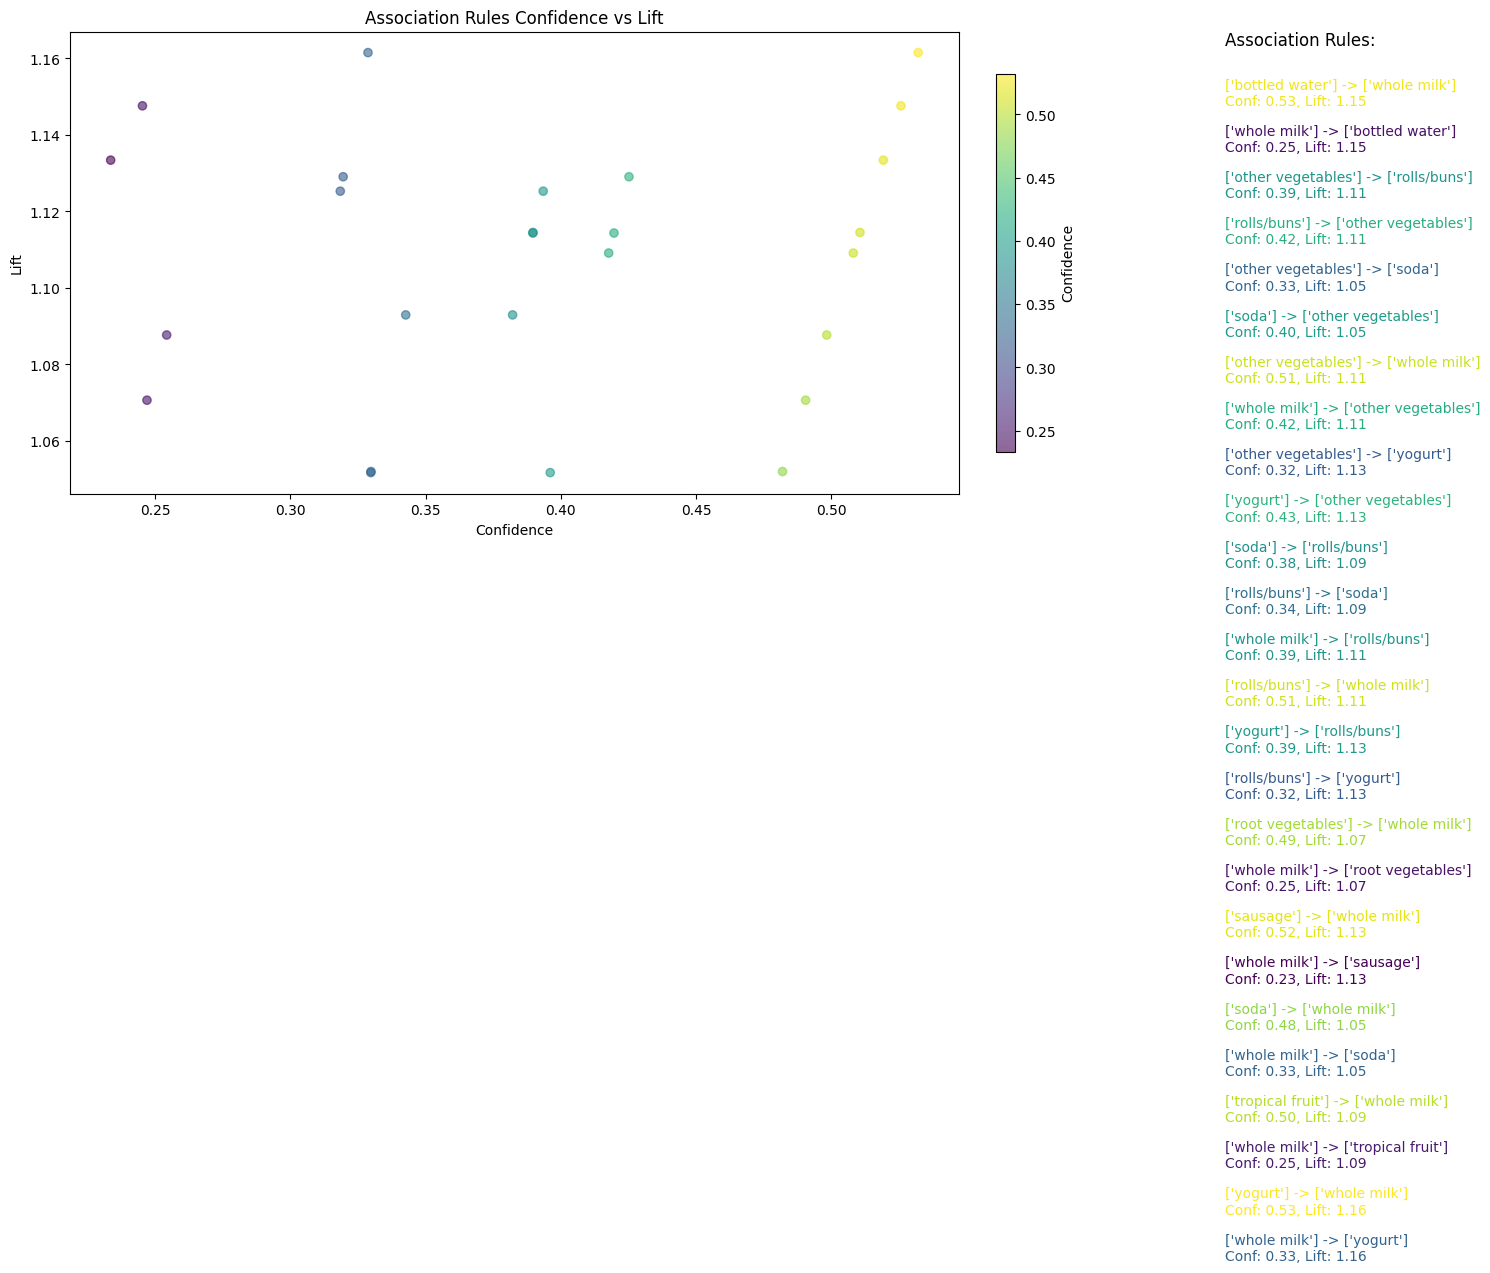

In [15]:
norm = plt.Normalize(rules['confidence'].min(), rules['confidence'].max())  # Normalize confidence values
cmap = plt.get_cmap("viridis")  # Choose a color map (e.g., 'viridis', 'plasma', etc.)

# Create the scatter plot with color based on confidence
plt.figure(figsize=(14, 6))  # Increase figure size for space
scatter = plt.scatter(rules['confidence'], rules['lift'], c=rules['confidence'], cmap=cmap, alpha=0.6)

# Add labels for each point (rule) with colored names
for i in range(len(rules)):
    plt.annotate('', (rules['confidence'][i], rules['lift'][i]),  # No annotations on the plot itself
                 fontsize=8, alpha=0.7)

# Add axis labels and title
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Association Rules Confidence vs Lift')

# Adjust layout to place more space for the colorbar and product names
plt.subplots_adjust(right=0.80)  # Increase space for product names

# Add colorbar to indicate confidence scale
cbar = plt.colorbar(scatter, fraction=0.02, pad=0.04)  # 'fraction' controls the width of the colorbar
cbar.set_label('Confidence')

# Display the product names and rules on the side (more space to the right)
plt.text(1.3, 1, "Association Rules:", ha='left', va='top', fontsize=12, transform=plt.gca().transAxes)

# List the products with corresponding confidence and lift values, and color the names
for i in range(len(rules)):
    rule_text = f"{list(rules['antecedents'][i])} -> {list(rules['consequents'][i])}\n" \
                f"Conf: {rules['confidence'][i]:.2f}, Lift: {rules['lift'][i]:.2f}"
    color = cmap(norm(rules['confidence'][i]))  # Get the color based on confidence
    plt.text(1.3, 0.9 - i * 0.1, rule_text, ha='left', va='top', fontsize=10, transform=plt.gca().transAxes, color=color)

# Display the plot
plt.show()


In [13]:
frequent_itemsets_fp = fpgrowth(df, min_support=0.02, use_colnames=True)


print(frequent_itemsets_fp.head())

    support      itemsets
0  0.458184  (whole milk)
1  0.313494        (soda)
2  0.282966      (yogurt)
3  0.206003     (sausage)
4  0.177527      (pastry)
